In [1]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [7]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [8]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=10,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 80us/step - loss: 2.5767 - accuracy: 0.5336 - val_loss: 1.6790 - val_accuracy: 0.6400
Epoch 2/10
7982/7982 [==============================] - 0s 48us/step - loss: 1.3898 - accuracy: 0.7013 - val_loss: 1.3112 - val_accuracy: 0.6920
Epoch 3/10
7982/7982 [==============================] - 0s 47us/step - loss: 1.0421 - accuracy: 0.7695 - val_loss: 1.1365 - val_accuracy: 0.7510
Epoch 4/10
7982/7982 [==============================] - 0s 47us/step - loss: 0.8255 - accuracy: 0.8236 - val_loss: 1.0302 - val_accuracy: 0.7820
Epoch 5/10
7982/7982 [==============================] - 0s 48us/step - loss: 0.6575 - accuracy: 0.8617 - val_loss: 0.9944 - val_accuracy: 0.7850
Epoch 6/10
7982/7982 [==============================] - 0s 48us/step - loss: 0.5271 - accuracy: 0.8885 - val_loss: 0.9382 - val_accuracy: 0.8070
Epoch 7/10
7982/7982 [==============================] - 0s 49us/step - loss: 0.419

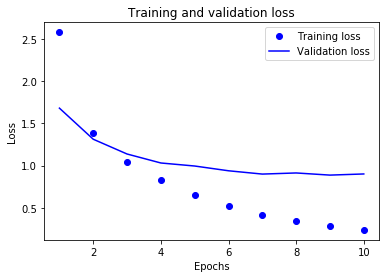

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

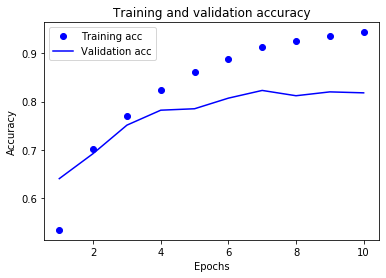

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

2246/2246 [==============================] - 0s 80us/step
[0.9861783892155118, 0.7889581322669983]


In [14]:
predictions = model.predict(x_test)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

0.99999994
3
